<a href="https://colab.research.google.com/github/Kimhantag/Posco_AIBigdata_Academy25_edu/blob/main/1_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Backpropagation

In [ ]:
import tensorflow as tf  # TensorFlow 라이브러리를 tf로 임포트합니다. TensorFlow는 기계 학습과 수치 계산에 사용됩니다.
import numpy as np  # numpy 라이브러리를 np로 임포트합니다. numpy는 배열에 대한 수치 연산을 위해 사용됩니다.
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트합니다. 이는 그래프를 그리기 위해 사용됩니다.
import random  # random 모듈을 임포트합니다. 이 모듈은 난수를 생성하는 데 사용됩니다.

# 아래 세 줄은 재현 가능한 결과를 얻기 위해 난수 생성기의 시드 값을 설정합니다.
random.seed(1)  # Python 내장 random 모듈의 시드 값을 1로 설정합니다.
np.random.seed(1)  # numpy 라이브러리의 난수 생성기 시드 값을 1로 설정합니다.
tf.random.set_seed(1)  # TensorFlow의 난수 생성기 시드 값을 1로 설정합니다.

# TensorFlow 상수를 정의합니다. 이 상수들은 계산에 사용될 값들입니다.
h_wo = tf.constant([0.05321,0.05352,0.05253])  # h_wo 상수를 정의합니다. 여기서는 특정 연산에 사용될 예정입니다.
e =  tf.constant([0.05224,0.05246,0.05217])  # e 상수를 정의합니다. 다른 계산에 사용됩니다.
h_w = tf.constant([0.05735,0.05632,0.05751])  # h_w 상수를 정의합니다. 또 다른 계산에 사용될 예정입니다.

# 각 상수의 평균값을 계산합니다.
m1 = tf.reduce_mean(h_wo)  # h_wo의 평균값을 계산합니다.
m2 = tf.reduce_mean(e)  # e의 평균값을 계산합니다.
m3 = tf.reduce_mean(h_w)  # h_w의 평균값을 계산합니다.

# 계산된 평균값을 출력합니다.
print(m1)  # m1의 값을 출력합니다.
print(m2)  # m2의 값을 출력합니다.
print(m3)  # m3의 값을 출력합니다.


tf.Tensor(0.05308667, shape=(), dtype=float32)
tf.Tensor(0.052290004, shape=(), dtype=float32)
tf.Tensor(0.05706, shape=(), dtype=float32)


In [ ]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))  # 8x6 크기의 새로운 그래프 창을 생성합니다.

    if str_title is not None :  # str_title 변수가 None이 아닐 경우, 즉 제목이 주어진 경우 실행됩니다.
        plt.title(str_title, fontsize=20, pad=20)  # 그래프의 제목을 설정합니다. 제목의 글꼴 크기는 20, 제목과 그래프 상단 간의 패딩은 20으로 설정됩니다.

    plt.plot(X, Y, ls='none', marker='o')  # X와 Y 데이터 포인트를 선 없이, 각 데이터 포인트를 'o' 모양의 마커로 표시하여 그래프에 플로팅합니다.

    if X_hat is not None and Y_hat is not None:  # X_hat과 Y_hat이 모두 None이 아닐 경우, 즉 예측된 데이터 포인트가 주어진 경우 실행됩니다.
        plt.plot(X_hat, Y_hat)  # 예측된 X_hat, Y_hat 데이터 포인트를 그래프에 선으로 연결하여 플로팅합니다.

    plt.tick_params(axis='both', labelsize=14)  # 눈금 레이블의 크기를 14로 설정합니다. 이 설정은 X축과 Y축 모두에 적용됩니다.


In [ ]:
x_0 = tf.random.normal([20], 3, 1) # 평균이 3이고 표준편차가 1인 정규분포에서 20개의 샘플을 생성합니다.
y_0 = tf.zeros(20) # 길이가 20인 0으로 채워진 텐서를 생성합니다. 이는 x_0 데이터에 대한 레이블로 사용됩니다.
x_1 = tf.random.normal([20], 5.5, 1) # 평균이 5.5이고 표준편차가 1인 정규분포에서 다른 20개의 샘플을 생성합니다.
y_1 = tf.ones(20) # 길이가 20인 1로 채워진 텐서를 생성합니다. 이는 x_1 데이터에 대한 레이블로 사용됩니다.

x = tf.concat([x_0,x_1],0) # x_0과 x_1을 병합하여 새로운 x 데이터 세트를 생성합니다.
y = tf.concat([y_0, y_1],0) # y_0과 y_1을 병합하여 새로운 y 데이터 세트(레이블)를 생성합니다.

print(x.shape) # x의 모양을 출력합니다. 결과는 (40,)이 될 것입니다, 즉 40개의 요소를 가진 1차원 벡터입니다.
print(y.shape) # y의 모양을 출력합니다. 마찬가지로, 결과는 (40,)이 될 것입니다.
print(x) # x 데이터 세트의 실제 값을 출력합니다.
print(y) # y 데이터 세트(레이블)의 실제 값을 출력합니다.


(40,)
(40,)
tf.Tensor(
[1.8987797 4.5457516 3.383644  2.1203423 1.7753278 2.018879  3.087808
 2.7967396 2.4418437 2.279456  2.3740077 2.284974  2.6516457 2.66353
 3.1825757 4.1085954 4.279659  2.9785242 2.6803112 3.3733256 5.903088
 4.411979  5.4369044 6.8365564 6.21176   5.0107136 4.735779  4.4627514
 4.248066  5.5212245 4.948624  3.7568302 5.164639  4.4573326 6.509138
 6.7362537 4.816311  6.173609  5.079377  4.4586973], shape=(40,), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(40,), dtype=float32)


In [ ]:
def cross_entropy(x, y, w, b):
    # x: 입력 데이터, y: 실제 레이블, w: 가중치, b: 편향
    y_pred = tf.sigmoid(x*w+b)  # 입력 데이터 x에 대한 모델의 예측값을 계산합니다. 여기서 tf.sigmoid는 시그모이드 활성화 함수입니다.
    # 교차 엔트로피 손실을 계산합니다. 손실은 모델 예측과 실제 레이블 간의 차이를 나타냅니다.
    return -tf.reduce_sum(y*tf.math.log(y_pred) + (1-y)*tf.math.log(1-y_pred))

def cal_gradient(x, y, w, b):
    # 경사(gradient)를 계산하기 위한 함수입니다.
    b_gradient = 0
    w_gradient = 0
    N = tf.shape(x)[0]  # 입력 데이터 x의 총 개수입니다.
    for i in range(0, N):
        x_i = x[i]  # i번째 데이터 포인트입니다.
        y_i = y[i]  # i번째 실제 레이블입니다.
        y_pred = tf.sigmoid(x_i*w+b)  # i번째 데이터 포인트에 대한 예측값입니다.

        # 손실 함수의 편미분을 계산합니다. 이를 통해 w와 b에 대한 경사를 구합니다.
        dL_df1 = -(y_i-y_pred)/(y_pred*(1-y_pred))
        dL_df2 = dL_df1*(y_pred*(1-y_pred))

        b_gradient += dL_df2  # 편향 b에 대한 경사를 누적합니다.
        w_gradient += dL_df2*x_i  # 가중치 w에 대한 경사를 누적합니다.

    return [w_gradient, b_gradient]  # 계산된 경사를 반환합니다.

def apply_gradient(gradients, parameters, learning_rate):
    # 계산된 경사를 사용하여 가중치와 편향을 업데이트하는 함수입니다.
    [w_g, b_g] = gradients  # w와 b에 대한 경사입니다.
    [w, b] = parameters  # 현재의 가중치와 편향입니다.
    w = w - learning_rate * w_g  # 가중치를 업데이트합니다.
    b = b - learning_rate * b_g  # 편향을 업데이트합니다.
    return [w, b]  # 업데이트된 가중치와 편향을 반환합니다.

def run_opt(x, y, w, b, learning_rate):
    # 모델을 최적화하기 위해 위의 함수들을 순차적으로 호출하는 함수입니다.
    gradients = cal_gradient(x, y, w, b)  # 경사를 계산합니다.
    return apply_gradient(gradients, [w, b], learning_rate)  # 계산된 경사를 적용하여 모델 파라미터를 업데이트하고 반환합니다.


In [ ]:
# 가중치(w)와 편향(b) 변수를 초기화합니다. 표준 편차가 1인 정규 분포를 사용하여 초기값을 설정합니다.
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

learning_rate = 0.005  # 학습률을 설정합니다. 학습률은 경사 하강법에서 각 단계에서 파라미터를 얼마나 조정할지를 결정합니다.
training_steps = 2000  # 총 학습 단계(반복 횟수)를 설정합니다.
display_step = 200  # 진행 상황을 표시할 단계 간격을 설정합니다.

for step in range(training_steps):  # 지정된 학습 단계만큼 반복합니다.
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)  # 현재 가중치와 편향에 대해 한 단계의 최적화를 수행하고 새로운 값을 얻습니다.
    w = w_new  # 가중치를 새로운 값으로 업데이트합니다.
    b = b_new  # 편향을 새로운 값으로 업데이트합니다.

    if step % display_step == 0:  # 지정된 단계 간격마다 현재의 손실과 파라미터 값을 출력합니다.
        loss = cross_entropy(x, y, w, b)  # 현재의 가중치와 편향을 사용하여 손실을 계산합니다.
        # 현재 단계, 손실, 가중치, 편향의 값을 출력합니다.
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())


step:  0 , loss:  36.695183 , w:  [-0.26500767] , b:  [1.7008125]
step:  200 , loss:  15.902734 , w:  [0.72361106] , b:  [-2.5827224]
step:  400 , loss:  11.788679 , w:  [1.1880534] , b:  [-4.5297217]
step:  600 , loss:  10.208406 , w:  [1.480134] , b:  [-5.7455726]
step:  800 , loss:  9.379108 , w:  [1.6921266] , b:  [-6.62865]
step:  1000 , loss:  8.869535 , w:  [1.8581482] , b:  [-7.3217063]
step:  1200 , loss:  8.5255575 , w:  [1.9943317] , b:  [-7.8915095]
step:  1400 , loss:  8.278458 , w:  [2.1095588] , b:  [-8.374663]
step:  1600 , loss:  8.092949 , w:  [2.2092354] , b:  [-8.793421]
step:  1800 , loss:  7.949015 , w:  [2.2969038] , b:  [-9.162362]


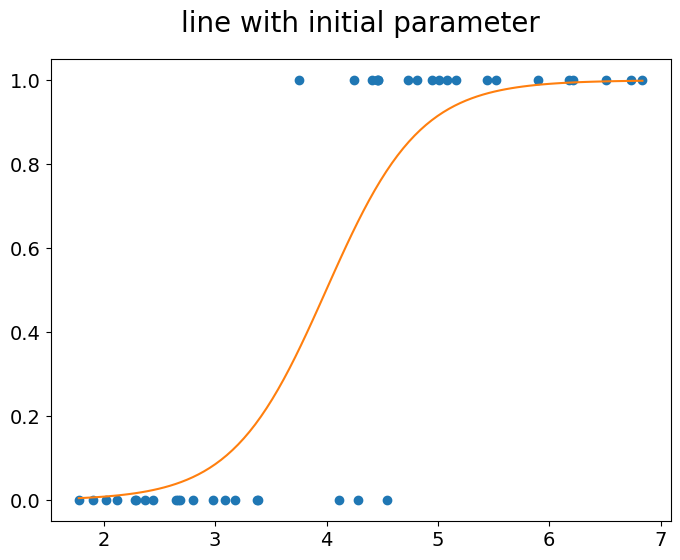

In [ ]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, tf.sigmoid(w*x_fl+b), str_title="line with initial parameter")